# Exercise 2

## Rosenbrock Function

#### Define the objective function

In [118]:
%matplotlib inline
from scipy.optimize import minimize, Bounds
import math
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

b_iterations = []

def banana(x):
    x1, x2 = list(x)
    result = 100 * (x2 - x1 ** 2) ** 2 + (1 - x1) ** 2 
    b_iterations.append([x1, x2, result])
    return result

#### Define bounds and send the parameters to scipy.minimize

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 113
         Function evaluations: 215
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 104
         Function evaluations: 201
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 153
         Function evaluations: 284
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 124
         Function evaluations: 236
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 109
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 144
         Function evaluations: 268
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 122
         Function evaluations: 229
Optimization termina

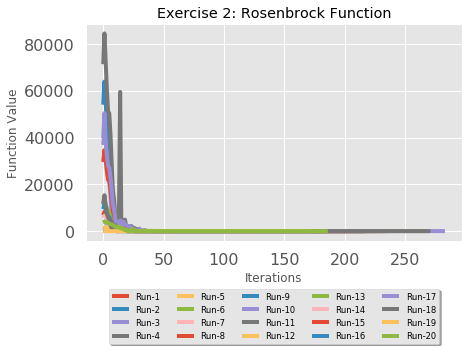

In [121]:
initial_guesses = []
for i in range(20):
    initial_guesses.append([random.uniform(-5,5), random.uniform(-5,5)])

plt.figure()

i=0
for inits in initial_guesses:
    b_iterations = []
    i=i+1
    banana_bounds = Bounds(-5, 5)
    bsol = minimize(banana, x0=inits, bounds=banana_bounds, method='nelder-mead', \
                    options={'xtol': 1e-8, 'disp': True})
    apt = np.array(b_iterations)
    pt = PrettyTable()
    pt.add_column("x1",apt[:,0])
    pt.add_column("x2",apt[:,1])
    pt.add_column("obj",apt[:,2])
    plt.plot([i for i in range(apt.shape[0])], apt[:,2], label=f"Run-{i}")
    
plt.title("Exercise 2: Rosenbrock Function")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),\
          fancybox=True, shadow=True, ncol=5,prop=fontP)
plt.show()


## Observations

1. Made 20 runs with random initial guesses each time
2. Scipy made more than one functional evaluations for each iterations for this method (nelder-mead). 
3. All the runs found global minimum and the worst run did it at around 30 iterations

### Eggcrate Function

#### Define objective function

In [92]:
e_iterations = []
def eggcrate(x):
    x1, x2 = list(x)
    return x1 ** 2 + x2 ** 2 + 25 * (math.sin(x1) ** 2 + math.sin(x2) ** 2)

def egg_callback(xp):
    x1, x2 = list(xp)
    result = eggcrate(xp)
    e_iterations.append([x1, x2, result])

In [93]:
random.uniform(-twopi, twopi)

2.915635516211367

In [94]:
twopi = (2 * math.pi)
initial_guesses = []
for i in range(10):
    initial_guesses.append([random.uniform(-twopi, twopi), random.uniform(-twopi, twopi)])
    
print(initial_guesses)

[[5.433038096812728, -1.6178487598670932], [-2.349468286474147, 4.975573542088725], [2.933956958154953, 4.753226077868854], [4.3378429440231585, -0.18792219907420993], [-2.218016028545313, 5.551217704510389], [-2.294741477517435, -0.4620866089054081], [0.06822494696911363, -4.988926886317727], [4.84498287185334, -1.6254758073700977], [-5.413401705422894, -5.956076538836063], [-4.910513155343167, 6.23008646520654]]


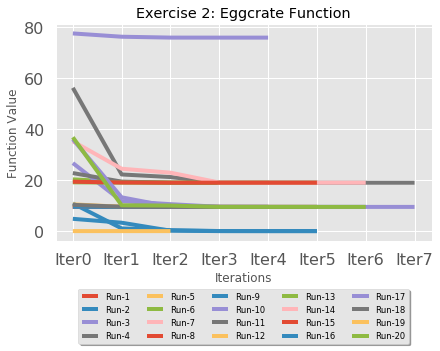

In [123]:
plt.figure()
i=0 
for inits in initial_guesses:
    i=i+1
    e_iterations = []
    eggcrate_bounds = Bounds(0 - (2 * math.pi), int(2 * math.pi))
    eggsol = minimize(eggcrate, x0=inits, bounds=eggcrate_bounds, callback= egg_callback, \
                      method='TNC',options={'xtol': 1e-8, 'disp': True})
    temp2= np.array(e_iterations)
    ept = PrettyTable()
    ept.add_column("x1",temp2[:,0])
    ept.add_column("x2",temp2[:,1])
    ept.add_column("obj",temp2[:,2])
    xvalues = [f"Iter{i}" for i in range(temp2.shape[0])]
    plt.plot(xvalues, temp2[:,2], label=f"Run-{i}")

plt.title("Exercise 2: Eggcrate Function")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),\
          fancybox=True, shadow=True, ncol=5,prop=fontP)
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()

### Observations

1. About 17 runs got stuck in local minimum
2. 3 runs found global minimum
3. The number of iterations is very low due to the large number of local minima

## Golinksi Speed Reducer

In [96]:
g_iterations = []

def golinski(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    result =  0.7854 * x1 * (x2 ** 2) * (3.3333 * (x3 ** 2) + 14.9334 * x3 - 43.0934) \
           - 1.5079 * x1 * ((x6 ** 2) + (x7 ** 2)) + 7.477 * ((x6 ** 3) + (x7 ** 3)) \
           + 0.7854 * (x4 * (x6 ** 2) + (x5 * (x7 ** 2)))
    g_iterations.append([x1, x2, x3, x4, x5, x6, x7,result])
    return result

### Define Contraint Functions

In [97]:
def gol_cons1(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (27 * (x1 ** -1) * (x2 ** -2) * (x3 ** -1) - 1)


def gol_cons2(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (397.5 * (x1 ** -1) * (x2 ** -2) * (x3 ** -2) - 1)


def gol_cons3(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (1.93 * (x2 ** -1) * (x3 ** -1) * (x4 ** 3) * (x6 ** -4) - 1)

def gol_cons4(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return - (1.93 * (x2 ** -1) * (x3 ** -1) * (x5 ** 3) * (x7 ** -4) - 1)

def gol_cons5(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    numerator = ((745 * x4 * (x2**-1) *(x3**-1))**2 + 16.9* (10**6)) ** 0.5
    denominator = (110.0 * (x6**3))
    return 1 - (numerator/denominator)

def gol_cons6(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    numerator = ((745 * x5 * (x2**-1) *(x3**-1))**2 + 157.5* (10**6)) ** 0.5
    denominator = (85.0 * (x7**3))
    return 1 - (numerator/denominator)

def gol_cons7(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (x2*x3/40)

def gol_cons8(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (5*x2/x1)

def gol_cons9(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - (x1/(12*x2))

def gol_cons24(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - ((1.5 * x6 + 1.9) * (x4**-1))

def gol_cons25(x):
    x1, x2, x3, x4, x5, x6, x7 = list(x)
    return 1 - ((1.1 * x7 + 1.9) * (x5**-1))

con1 = {'type': 'ineq', 'fun': gol_cons1}
con2 = {'type': 'ineq', 'fun': gol_cons2}
con3 = {'type': 'ineq', 'fun': gol_cons3}
con4 = {'type': 'ineq', 'fun': gol_cons4}
con5 = {'type': 'ineq', 'fun': gol_cons5}
con6 = {'type': 'ineq', 'fun': gol_cons6}
con7 = {'type': 'ineq', 'fun': gol_cons7}
con8 = {'type': 'ineq', 'fun': gol_cons8}
con9 = {'type': 'ineq', 'fun': gol_cons9}
con24 = {'type': 'ineq', 'fun': gol_cons24}
con25 = {'type': 'ineq', 'fun': gol_cons25}
cons = ([con1, con2, con3, con4, con5, con6, con7, con8, con9, con24, con25])

### Define Bounds

In [98]:
b1=(2.6,3.6)
b2=(0.7,0.8)
b3=(17,28)
b4=(7.3,8.3)
b5=(7.3,8.3)
b6=(2.9,3.9)
b7=(5,5.5)
bounds = (b1,b2,b3,b4,b5,b6,b7)

### Run optimisation

In [99]:
temp3.shape

(47, 8)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 2994.349865180934
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 6
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2994.3550050549043
            Iterations: 5
            Function evaluations: 46
            Gradient evaluations: 5
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 2994.351725373577
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 7
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2994.3552358327624
            Iterations: 4
            Function evaluations: 47
            Gradient evaluations: 4
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2994.354896917717
            Iterations: 9
           

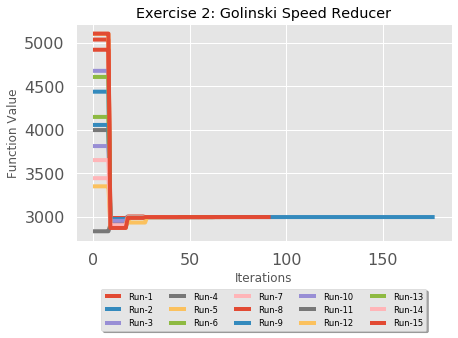

In [125]:
g_iterations=[]
np.set_printoptions(precision=4)
plt.figure()
initial_guesses=[]
for i in range(15):
    initial_guesses.append([random.uniform(2.6,3.6),random.uniform(0.7,0.8),
                           random.uniform(17,28),random.uniform(7.3,8.3),
                           random.uniform(7.3,8.3),random.uniform(2.9,3.9),
                           random.uniform(5,5.5)])

i=0
for inits in initial_guesses:
    i=i+1
    g_iterations=[]
    gol_sol = minimize(golinski, x0=inits, method='SLSQP', bounds=bounds, constraints=cons, \
                       options={'disp': True})
    temp3= np.array(g_iterations)
    gpt = PrettyTable()
    gpt.add_column("x1",temp3[:,0])
    gpt.add_column("x2",temp3[:,1])
    gpt.add_column("x3",temp3[:,2])
    gpt.add_column("x4",temp3[:,3])
    gpt.add_column("x5",temp3[:,4])
    gpt.add_column("x6",temp3[:,5])
    gpt.add_column("x7",temp3[:,6])
    gpt.add_column("obj",temp3[:,7])
    xvalues = [i for i in range(temp3.shape[0])]
    plt.plot(xvalues, temp3[:,7], label= f"Run-{i}")

plt.title("Exercise 2: Golinski Speed Reducer")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),\
          fancybox=True, shadow=True, ncol=5,prop=fontP)
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()

### Observations

1. All the runs found global minimum which is approximately 2994
2. Most of the runs took more than 50 iterations to complete. One run took more than 150